## 유사한 얼굴끼리 군집화 하기 
1. 얼굴 Feature Vector 값 로드 
2. 군집화 수 K결정 → 
$$ K \approx  \sqrt{\frac{N}{2}} $$
3. K-Means로 군집화
4. 군집화 결과 보기 
5. Centroid와 가장 유사한 얼굴 찾아 보기  : 중심 얼굴
6. K의 값을 변경해 가면 적절한 값을 찾기 

In [1]:
## 1. 얼굴 Feature Vector 값 로드 
from __future__ import print_function
import pandas as pd 
%matplotlib inline
landmark_ds = pd.DataFrame.from_csv('/Users/goodvc/data/fc-recsys-school/ch2/resource/landmark.csv')
landmark_ds.head()

,eye_to_eye,eye_width,lip_to_chin,face_width,eyebrow_width,face_height,nose_width,mouth_width,lip_to_nose
GyuseungKyeong:01,0.60659,0.84433,0.17473,0.31497,0.05844,1,0.37294,0.43512,0.17407
GyuseungKyeong:02,0.67471,0.95712,0.19845,0.36870,0.06168,1,0.44941,0.53248,0.16256
GyuseungKyeong:03,0.54750,0.77295,0.20055,0.28634,0.05422,1,0.36095,0.45304,0.18315
beomheepark:01,0.61961,0.87665,0.23048,0.33601,0.05524,1,0.36426,0.50411,0.20119
beomheepark:02,0.73309,1.05742,0.29486,0.47260,0.05732,1,0.49046,0.68046,0.23118


---
## K-Means로 클러스터링하기

* 군집화 수 결정
$$ K \approx  \sqrt{\frac{N}{2}} $$


In [24]:
## 2. 군집화 수 K결정 sqrt(N/2)
import numpy as np
import math

K = math.ceil(np.sqrt(landmark_ds.count()[0]/2))
print ("K=", K)


K= 6.0


In [25]:
from sklearn.cluster import KMeans
X = landmark_ds.values
cluster = KMeans(n_clusters=6)
cluster.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=6, n_init=10,
    n_jobs=1, precompute_distances=True, random_state=None, tol=0.0001,
    verbose=0)

In [26]:
cluster.labels_

array([4, 1, 4, 4, 5, 5, 0, 1, 2, 0, 0, 4, 0, 0, 4, 4, 4, 4, 4, 1, 3, 4, 3,
       3, 3, 3, 3, 3, 4, 0, 4, 1, 1, 0, 1, 1, 3, 3, 0, 4, 1, 3, 4, 3, 5, 3,
       4, 3, 1, 3, 1, 3, 4, 0, 0, 0, 3, 1, 1, 2, 0, 5], dtype=int32)

In [27]:
## cluster 결과 
clustered = pd.DataFrame( [[a,b] for a,b in zip(landmark_ds.index, cluster.labels_)], \
                         columns=['name','group-id'], \
                         index=landmark_ds.index )
clustered.groupby(['group-id']).groups

{0: ['daesung:01',
  'eunjeeshin:01',
  'eunjeeshin:02',
  'eunjung:01',
  'eunjung:02',
  'jaeyoonyim:01',
  'jonghwan:03',
  'kimsoohyun:3',
  'sunghwan:03',
  'wonbin:1',
  'wonbin:2',
  'yanghwi:02'],
 1: ['GyuseungKyeong:02',
  'daesung:02',
  'gayeong:03',
  'jaeyoonyim:03',
  'jonghwan:01',
  'jypark:01',
  'jypark:03',
  'kimtaeyoun:02',
  'sechangoh:01',
  'sechangoh:03',
  'yangchibok:02',
  'yangchibok:03'],
 2: ['daesung:03', 'yanghwi:01'],
 3: ['geeyeol:02',
  'goodvc:01',
  'goodvc:02',
  'goodvc:03',
  'hansung:01',
  'hansung:02',
  'hansung:03',
  'kimsoohyun:1',
  'kimsoohyun:2',
  'kimtaeyoun:03',
  'leeyongseok:01',
  'namyoung:01',
  'namyoung:03',
  'sechangoh:02',
  'sunghwan:01',
  'wonbin:3'],
 4: ['GyuseungKyeong:01',
  'GyuseungKyeong:03',
  'beomheepark:01',
  'eunjeeshin:03',
  'eunjung:03',
  'eunseop:02',
  'eunseop:03',
  'gayeong:01',
  'gayeong:02',
  'geeyeol:03',
  'jaekeun:01',
  'jaeyoonyim:02',
  'kimtaeyoun:01',
  'landmark:raw',
  'namyoung:02',

In [28]:
cluster.cluster_centers_

array([[ 0.46321083,  0.66358333,  0.21237167,  0.24899167,  0.05485583,
         1.        ,  0.29297333,  0.3889475 ,  0.16630667],
       [ 0.66445917,  0.94690833,  0.20263167,  0.36280833,  0.05697833,
         1.        ,  0.430905  ,  0.5503625 ,  0.17036917],
       [ 0.933585  ,  1.34923   ,  0.2285    ,  0.487945  ,  0.05594   ,
         1.        ,  0.593105  ,  0.778245  ,  0.175255  ],
       [ 0.31691188,  0.44628313,  0.24389   ,  0.17866688,  0.05428313,
         1.        ,  0.195845  ,  0.24837063,  0.20139437],
       [ 0.58978125,  0.84016937,  0.22468562,  0.32351062,  0.05894   ,
         1.        ,  0.36657875,  0.4517575 ,  0.20609188],
       [ 0.8071675 ,  1.138015  ,  0.23227   ,  0.4504975 ,  0.054385  ,
         1.        ,  0.52287   ,  0.7243875 ,  0.1876325 ]])

## 군집화의 적정성 평가  ( 주관적 평가)
* 동일한 사람이 동일한 클러스터 많이 묶일수록 군집화가 적정하다. 
* 클러스터의 평균 이름수가 작을 수록 군집화가 적절하다고 판단

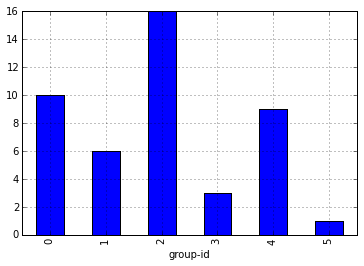

In [17]:
clustered['name_only'] = clustered['name'].apply(lambda x: x.split(':')[0])
clustered.groupby('group-id').name_only.nunique().plot(kind='bar')

In [18]:
clustered.groupby('group-id').name_only.nunique().mean()

7.5

In [19]:
clustered.sort(['group-id'])

,name,group-id,name_only
kimtaeyoun:03,kimtaeyoun:03,0,kimtaeyoun
geeyeol:02,geeyeol:02,0,geeyeol
kimsoohyun:1,kimsoohyun:1,0,kimsoohyun
goodvc:01,goodvc:01,0,goodvc
leeyongseok:01,leeyongseok:01,0,leeyongseok
namyoung:01,namyoung:01,0,namyoung
goodvc:02,goodvc:02,0,goodvc
namyoung:03,namyoung:03,0,namyoung
goodvc:03,goodvc:03,0,goodvc
hansung:01,hansung:01,0,hansung


---
## Hierarchical Clustering으로 군집화 하기 

In [20]:
from sklearn.cluster import AgglomerativeClustering
X = landmark_ds.values
cluster = AgglomerativeClustering(n_clusters=6,affinity='euclidean',linkage='ward')
cluster.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=6, n_components=None,
            pooling_func=<function mean at 0x1048acc08>)

In [21]:
## cluster 결과 
clustered = pd.DataFrame( [[a,b] for a,b in zip(landmark_ds.index, cluster.labels_)], \
                         columns=['name','group-id'], \
                         index=landmark_ds.index )
clustered.groupby(['group-id']).groups

{0: ['geeyeol:02',
  'goodvc:01',
  'goodvc:02',
  'goodvc:03',
  'hansung:01',
  'hansung:02',
  'hansung:03',
  'kimsoohyun:1',
  'kimsoohyun:2',
  'kimtaeyoun:03',
  'leeyongseok:01',
  'namyoung:01',
  'namyoung:03',
  'sechangoh:02',
  'sunghwan:01',
  'wonbin:3'],
 1: ['daesung:01',
  'eunjeeshin:01',
  'eunjeeshin:02',
  'eunjung:01',
  'eunjung:02',
  'jaeyoonyim:01',
  'jonghwan:03',
  'kimsoohyun:3',
  'sunghwan:03',
  'wonbin:1',
  'wonbin:2',
  'yanghwi:02'],
 2: ['GyuseungKyeong:01',
  'GyuseungKyeong:03',
  'beomheepark:01',
  'daesung:02',
  'eunjeeshin:03',
  'eunjung:03',
  'eunseop:02',
  'eunseop:03',
  'gayeong:01',
  'gayeong:02',
  'geeyeol:03',
  'jaekeun:01',
  'jaeyoonyim:02',
  'jonghwan:01',
  'kimtaeyoun:01',
  'kimtaeyoun:02',
  'landmark:raw',
  'namyoung:02',
  'sechangoh:03',
  'sunghwan:02'],
 3: ['daesung:03', 'leeyongseok:02', 'yanghwi:01', 'yanghwi:03'],
 4: ['GyuseungKyeong:02',
  'gayeong:03',
  'jaeyoonyim:03',
  'jypark:01',
  'jypark:03',
  'sec

In [22]:
clustered['name_only'] = clustered['name'].apply(lambda x: x.split(':')[0])
clustered.groupby('group-id').name_only.nunique().mean()

7.5